# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> 

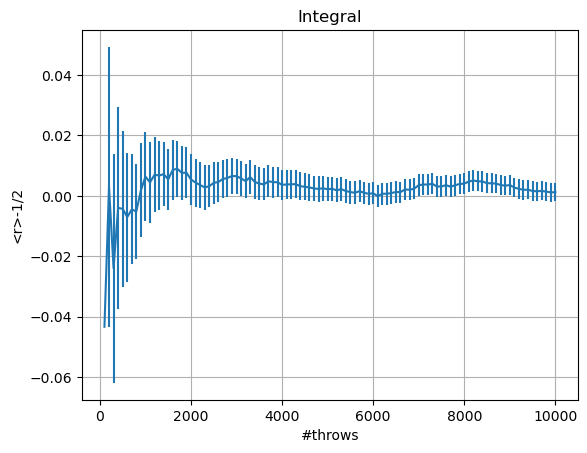

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Read the file into a pandas DataFrame
Meandata = pd.read_csv('mean.dat', header=None, sep='  ', engine='python')

# Extract the values and errors as separate Series
Mean = Meandata[0].tolist()
Mean_err = Meandata[1].tolist()

M=10000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block

x = np.arange( 1, len(Mean)+1)       # [1,2,...,N]
x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x, [val - 0.5 for val in Mean], yerr=Mean_err)
plt.title('Integral')
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>

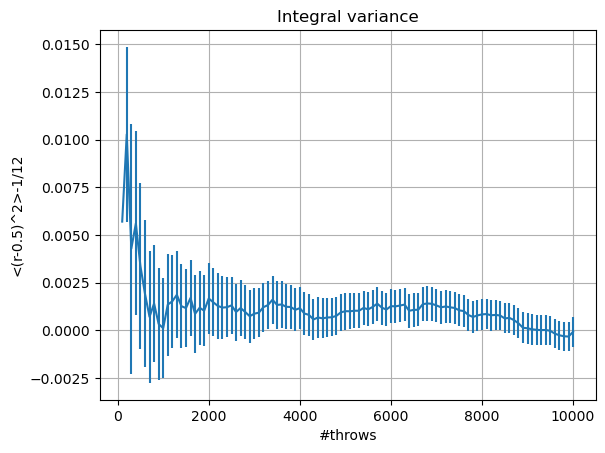

In [2]:
Variancedata = pd.read_csv('variance.dat', header=None, sep='  ', engine='python')

Variance = Variancedata[0].tolist()
Variance_err = Variancedata[1].tolist()

plt.errorbar(x, [val - 1/12 for val in Variance], yerr=Variance_err)
plt.title('Integral variance')
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

Text(0.5, 1.0, '$\\chi^2_j$')

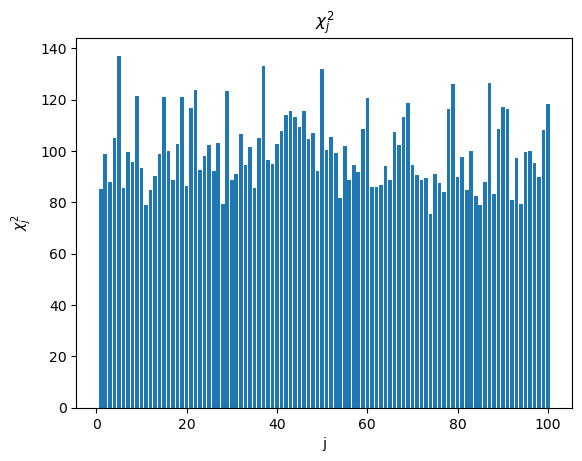

In [3]:
Chi2 = pd.read_csv('Chi2.dat', header=None)
x = np.arange( 1, len(Chi2)+1)       # [1,2,...,N]

# Plot the histogram using plt.bar()
plt.bar(x, Chi2[0].tolist())

# Add labels to the x- and y-axes
plt.xlabel('j')
plt.ylabel('$\chi^2_j$')
plt.title('$\chi^2_j$')

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

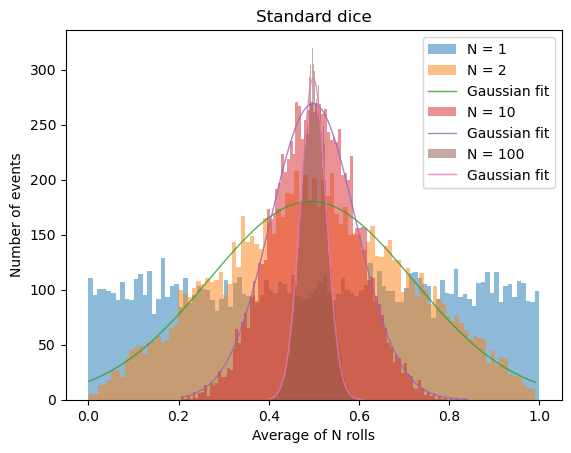

In [4]:
from scipy.stats import norm
from scipy.optimize import curve_fit

Nbins = 100
# Define the different values of summation number
Nsum = [1, 2, 10 , 100]
# Define the number of values for each case of Nsum
Ndata = 10000

# Load data from file
with open('standard.dat') as f:
    data = f.read().splitlines()

# Remove empty lines
data = list(filter(None, data))

# Split data into chunks of size Ndata
chunks = [data[i:i+Ndata] for i in range(0, len(data), Ndata)]

# Define the function to fit (a Gaussian)
def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# Loop over the chunks and create a separate histogram for each one
for i, chunk in enumerate(chunks):
    # Combine chunks into a single list of values
    values = [float(x) for x in chunk]

    # Find the mean and standard deviation of the data
    mu, sigma = norm.fit(values)

    # Initial guess for the parameters
    p0 = [1.0, mu, sigma]

    # Fit the function to the histogram (except for the first case)
    if i > 0:
        counts, bins, _ = plt.hist(values, bins=Nbins, alpha=0.5, label=f'N = {Nsum[i]}')
        popt, pcov = curve_fit(gaussian, bins[:-1], counts, p0=p0, maxfev=10000)

        # Create an x-axis for the fitted function
        x = np.linspace(min(bins), max(bins), 1000)

        # Evaluate the fitted function at the x-axis points
        y = gaussian(x, *popt)

        # Plot the fitted function
        plt.plot(x, y, linewidth=1, alpha=0.8, label='Gaussian fit')
    else:
        # Plot a histogram without a fit for the first case
        plt.hist(values, bins=Nbins, alpha=0.5, label=f'N = {Nsum[i]}')

plt.xlabel('Average of N rolls')
plt.ylabel('Number of events')
plt.title('Standard dice')
plt.legend()

plt.show()

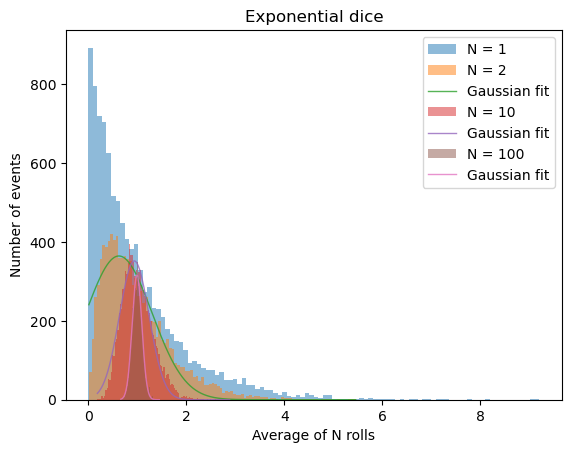

In [5]:
# Load data from file
with open('exp.dat') as f:
    data = f.read().splitlines()

# Remove empty lines
data = list(filter(None, data))

# Split data into chunks of size Ndata
chunks = [data[i:i+Ndata] for i in range(0, len(data), Ndata)]

# Loop over the chunks and create a separate histogram for each one
for i, chunk in enumerate(chunks):
    # Combine chunks into a single list of values
    values = [float(x) for x in chunk]

    # Plot the histogram
    if i == 0:
        plt.hist(values, bins=Nbins, alpha=0.5, label=f'N = {Nsum[i]}')
    else:
        # Find the mean and standard deviation of the data
        mu, sigma = norm.fit(values)

        # Initial guess for the parameters
        p0 = [1.0, mu, sigma]

        # Fit the function to the histogram
        counts, bins, _ = plt.hist(values, bins=Nbins, alpha=0.5, label=f'N = {Nsum[i]}')
        popt, pcov = curve_fit(gaussian, bins[:-1], counts, p0=p0, maxfev=1000000)

        # Create an x-axis for the fitted function
        x = np.linspace(min(bins), max(bins), 1000)

        # Evaluate the fitted function at the x-axis points
        y = gaussian(x, *popt)

        # Plot the fitted function
        plt.plot(x, y, linewidth=1, alpha=0.8, label='Gaussian fit')

plt.xlabel('Average of N rolls')
plt.ylabel('Number of events')
plt.title('Exponential dice')
plt.legend()

plt.show()

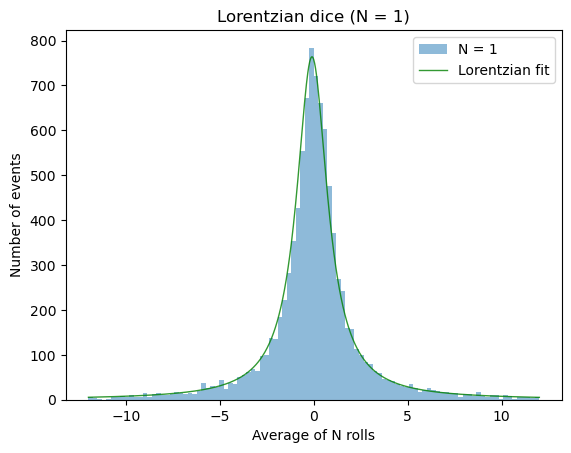

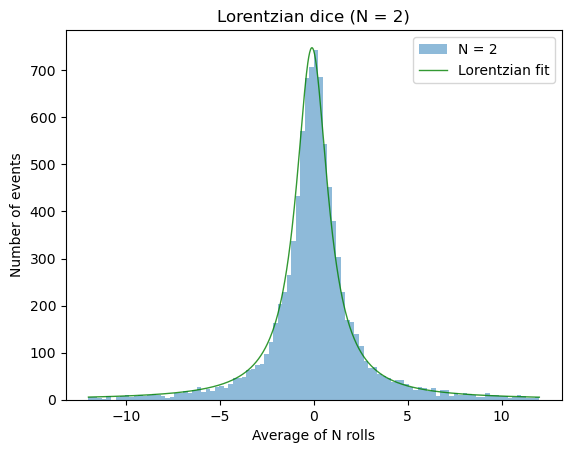

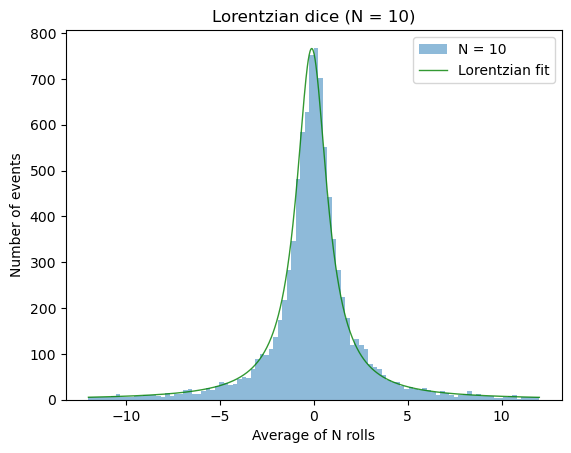

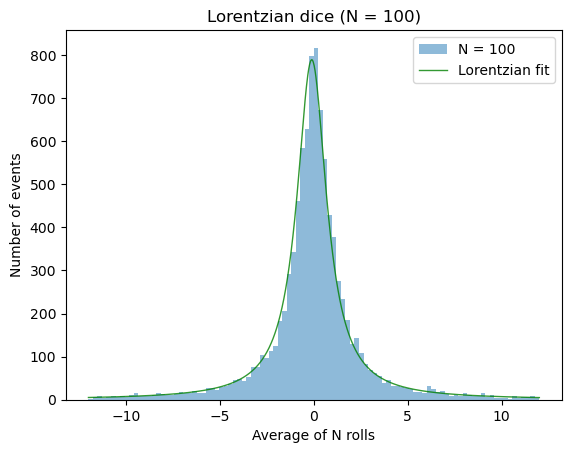

In [6]:
Nsum = [1, 2, 10 , 100]

# Load data from file
with open('Lorentz.dat') as f:
    data = f.read().splitlines()
    
# Remove empty lines
data = list(filter(None, data))

# Split data into chunks of size Ndata
chunks = [data[i:i + Ndata] for i in range(0, len(data), Ndata)]

# Define the function to fit (a Lorentzian)
def lorentzian(x, a, b, c):
    return a * b / ((x - c)**2 + b**2)

# Initial guess for the parameters
p0 = [1.0, 10.0, 2.0]

# Loop over the chunks and create a separate plot with fitted function for each one
for i, chunk in enumerate(chunks):
    # Convert chunk to a list of values
    values = list(map(float, chunk))
    #print(f"Chunk {i+1}: Length of values = {len(values)}")

    # Create a histogram
    #Nbins = 200
    counts, bins, _ = plt.hist(values, bins=Nbins, range=[-12., 12.], alpha=0.5, label=f'N = {Nsum[i]}')
    #print(f"Chunk {i+1}: Length of counts = {len(counts)}, Length of bins = {len(bins)}")

    # Fit the function to the histogram
    popt, pcov = curve_fit(lorentzian, bins[:-1], counts, p0=p0, maxfev=10000)

    # Create an x-axis for the fitted function
    x = np.linspace(min(bins), max(bins), 1000)

    # Evaluate the fitted function at the x-axis points
    y = lorentzian(x, *popt)

    # Plot the histogram and the fitted function
    plt.plot(x, y, 'g', linewidth=1, alpha=0.8, label='Lorentzian fit')
    plt.xlabel('Average of N rolls')
    plt.ylabel('Number of events')
    plt.title(f'Lorentzian dice (N = {Nsum[i]})')
    plt.legend()
    plt.show()

### Comments
The Central Limit Theorem (CLT) states:

A linear combination, $W = \sum_{i=1}^{N} a_iX_i$, of N independent random variables $X_i$ each having any probability distribution but with comparable expected values and finite variances of the same order of magnitude, tends towards a Gaussian distribution as the number of random variables increases. The expected value and variance of the linear combination are given by:

Mean $\mu = \sum_{i=1}^{N} a_i\mu_i$

Variance $\sigma^2 = \sum_{i=1}^{N} a_i^2\sigma_i^2$

This result implies that when combining multiple independent random variables with comparable expected values and finite variances, the resulting distribution converges to a Gaussian distribution with a mean equal to the weighted sum of the individual means and a variance equal to the weighted sum of the squared individual variances.

In the case of standard dice and exponential dice, which have finite variances, as N grows, their averages converge to a Gaussian distribution. This convergence occurs because the finite variance allows the individual variables to contribute to the overall distribution in a way that becomes more Gaussian-like with increasing N.

However, the Lorentzian dice, characterized by the Cauchy-Lorentz distribution, does not satisfy the assumptions of the Central Limit Theorem. Specifically, the Cauchy-Lorentz distribution does not have a finite variance. As a result, as N increases, the sums or averages of Lorentzian dice do not converge to a Gaussian distribution.

The absence of a finite variance in the Cauchy-Lorentz distribution leads to heavy tails and extreme fluctuations in the data, preventing the convergence to a Gaussian distribution predicted by the Central Limit Theorem. The Cauchy-Lorentz distribution retains its unique shape and properties even with increasing N.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

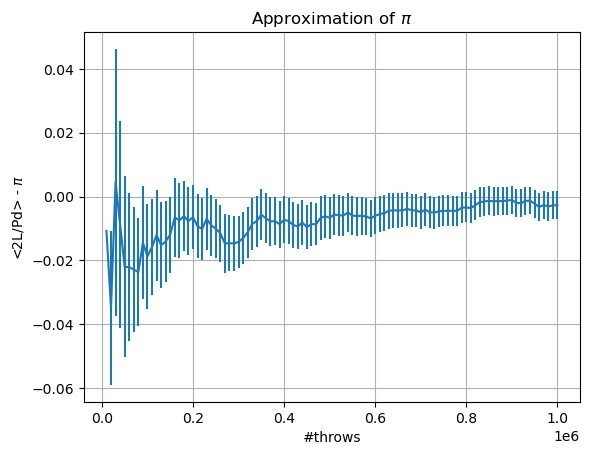

In [7]:
Pidata = pd.read_csv('Pi.dat', header=None, sep='  ', engine='python')

Pi = Pidata[0].tolist()
Pi_err = Pidata[1].tolist()

M = 1000000;     # number of throws
n = 100;         # number of blocks
L=int(M/N);       # number of throws in each block

x = np.arange( 1, len(Pi)+1)   
x*=L

plt.errorbar(x, [val - math.pi for val in Pi], yerr=Pi_err)
plt.xlabel('#throws')
plt.ylabel('<2L/Pd> - $\pi$')
plt.title('Approximation of $\pi$')
plt.grid(True)
plt.show()